# Question 3 script
### Is there a relationship between Category of EMS call outcome and the provider tenure?
## Entrance criteria:
The intermediate dataset for Patients has been created and includes:<br>
1. removal of rows with bad provider info (null for start date)
2. removal of duplicate rows
3. addition of encoded columns for categorical values

***

## Initialization of the script, loading libraries, etc.

In [284]:
import numpy as np
import pandas as pd
import datetime as dt

# Used for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Setup HTML display
from IPython.core.display import display, HTML
# Notebook cell width adjustment
display(HTML('<style>.container { width:80% !important; }</style>'))

## Read in the data file

In [285]:
df_patients = pd.read_csv(r'../data/02_intermediate/dfPatients_dedup.csv')
df_patients.shape

(543258, 22)

In [286]:
df_patients.head()

,Unnamed: 0,PatientId,FRDPersonnelID,Shift,UnitId,FireStation,Battalion,PatientOutcome,PatientGender,DispatchTime,...,CrewMemberRoles,TenureMonths,ShiftCode,Shift_A,Shift_B,Shift_C,UnitIdCode,PatientOutcomeCode,PatientGenderCode,ProviderGenderCode
0,0,479838,6ED7C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M404,4,401,Standby (No Services Performed),NaN,2018-01-01 00:29:02,...,"Primary Patient Caregiver-At Scene,Primary Pat...",244,1,1,0,0,1,1,0,1
1,1,479838,F39A55F0-C619-E511-80CA-001DD8B71D38,A - Shift,M404,4,401,Standby (No Services Performed),NaN,2018-01-01 00:29:02,...,"Driver-Transport,Other Patient Caregiver-At Scene",130,1,1,0,0,1,1,0,1
2,2,479838,D6D3C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M404,4,401,Standby (No Services Performed),NaN,2018-01-01 00:29:02,...,"Intern/Student,Other Patient Caregiver-At Scen...",112,1,1,0,0,1,1,0,1
3,3,479839,71D4C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M401,1,402,No Treatment/Transport Required,NaN,2018-01-01 00:40:54,...,"Primary Patient Caregiver-At Scene,Primary Pat...",74,1,1,0,0,2,2,0,1
4,4,479839,F9D4C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M401,1,402,No Treatment/Transport Required,NaN,2018-01-01 00:40:54,...,"Driver-Response,Driver-Transport",70,1,1,0,0,2,2,0,1


***
## Run some correlations to see if they look like they will work

In [287]:
df_patients.corr()

,Unnamed: 0,PatientId,FireStation,Battalion,TenureMonths,ShiftCode,Shift_A,Shift_B,Shift_C,UnitIdCode,PatientOutcomeCode,PatientGenderCode,ProviderGenderCode
Unnamed: 0,1.000000,0.999422,0.008726,-0.005648,0.039830,-0.002925,0.001216,0.002636,-0.003838,-0.021478,-0.009769,-0.011506,-0.009437
PatientId,0.999422,1.000000,0.008662,-0.005679,0.039910,-0.003549,0.001398,0.003350,-0.004732,-0.021233,-0.009477,-0.011875,-0.009500
FireStation,0.008726,0.008662,1.000000,-0.117038,0.079761,0.004305,-0.005486,0.003474,0.001978,0.153416,-0.014743,0.012443,0.018421
Battalion,-0.005648,-0.005679,-0.117038,1.000000,0.063703,-0.001897,0.003276,-0.003238,-0.000019,0.043197,-0.006221,0.000598,0.002628
TenureMonths,0.039830,0.039910,0.079761,0.063703,1.000000,-0.022047,0.019473,-0.000637,-0.018694,0.061970,0.041942,-0.028240,-0.057912
ShiftCode,-0.002925,-0.003549,0.004305,-0.001897,-0.022047,1.000000,-0.864428,-0.008471,0.866557,0.016143,0.004006,-0.004387,-0.028248
Shift_A,0.001216,0.001398,-0.005486,0.003276,0.019473,-0.864428,1.000000,-0.495417,-0.498160,-0.010472,-0.003789,0.009846,0.004980
Shift_B,0.002636,0.003350,0.003474,-0.003238,-0.000637,-0.008471,-0.495417,1.000000,-0.506401,-0.007063,0.000615,-0.012004,0.038900
Shift_C,-0.003838,-0.004732,0.001978,-0.000019,-0.018694,0.866557,-0.498160,-0.506401,1.000000,0.017446,0.003148,0.002209,-0.043774
UnitIdCode,-0.021478,-0.021233,0.153416,0.043197,0.061970,0.016143,-0.010472,-0.007063,0.017446,1.000000,0.221880,-0.144546,-0.001742


Text(0.5, 1, 'Correlation Heatmap')

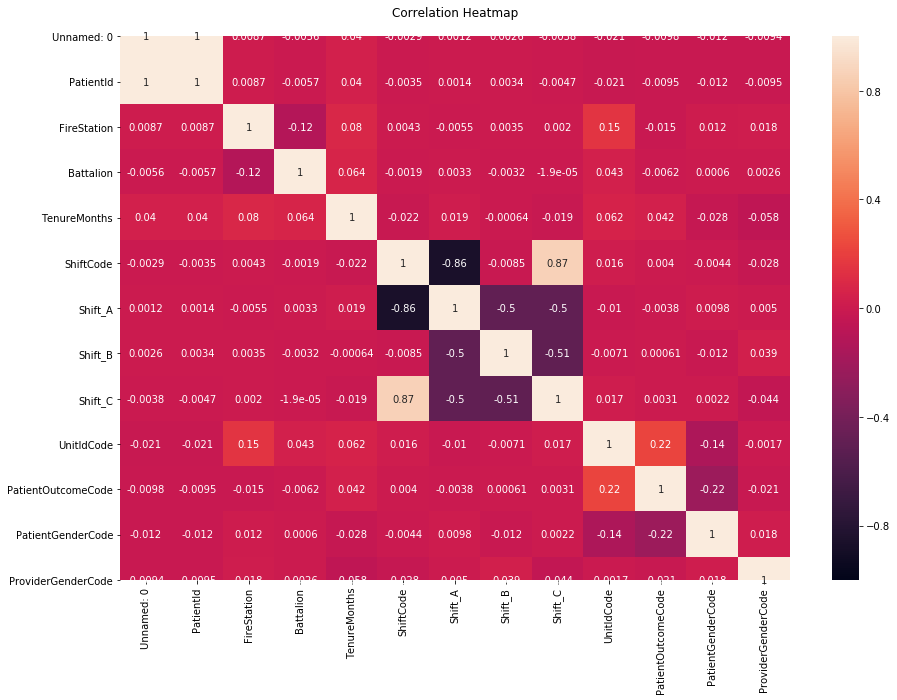

In [288]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(df_patients.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12},pad=20)

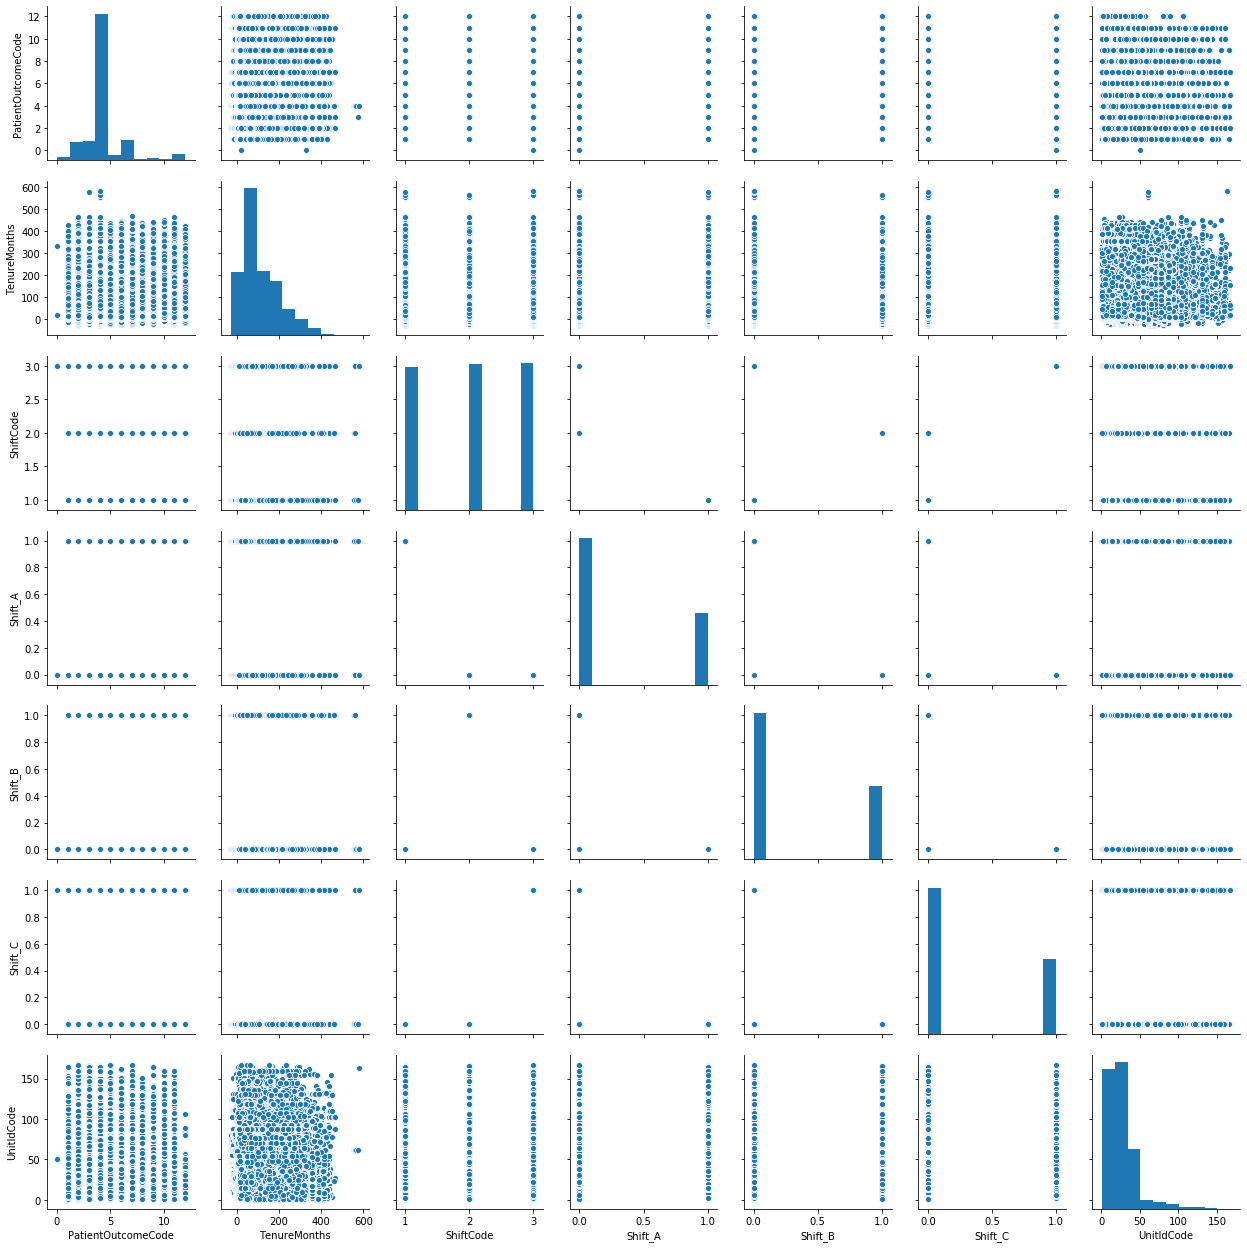

In [289]:
sns.pairplot(df_patients, vars=['PatientOutcomeCode','TenureMonths', 'ShiftCode', 'Shift_A', 'Shift_B', 'Shift_C', 'UnitIdCode' ])

## Looks Like simple correlations are not going to be very useful so lets look at some other ways to investigate relationships
***
## But first we need to check out the tenure of the providers so we have a better understanding of what we are working with.

In [347]:
df_patients["TenureMonths"].describe()


count    543258.000000
mean        111.532568
std          86.889581
min         -27.000000
25%          44.000000
50%          80.000000
75%         163.000000
max         580.000000
Name: TenureMonths, dtype: float64

Clearly a tenure should not be negative so why is our min = -27?

## Convert the date fields that were read in as strings into datetime objects

In [291]:

df_patients["DispatchTime"]=df_patients["DispatchTime"].astype('datetime64[ns]')
df_patients["FRDPersonnelStartDate"]=df_patients["FRDPersonnelStartDate"].astype('datetime64[ns]')


In [292]:
df_patients.head(1)


,Unnamed: 0,PatientId,FRDPersonnelID,Shift,UnitId,FireStation,Battalion,PatientOutcome,PatientGender,DispatchTime,...,CrewMemberRoles,TenureMonths,ShiftCode,Shift_A,Shift_B,Shift_C,UnitIdCode,PatientOutcomeCode,PatientGenderCode,ProviderGenderCode
0,0,479838,6ED7C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M404,4,401,Standby (No Services Performed),NaN,2018-01-01 00:29:02,...,"Primary Patient Caregiver-At Scene,Primary Pat...",244,1,1,0,0,1,1,0,1


## Find the time travelers (those with start dates after the dispatch date)

In [293]:
#Extract the records with a time traveler for a provider and put them in a new dataset
df_TimeTravelers=df_patients[(df_patients["DispatchTime"].dt.date - df_patients["FRDPersonnelStartDate"].dt.date)<dt.timedelta()]
df_TimeTravelers.shape

(573, 22)

In [294]:
# Create a dataframe with just the FRD Personnel Information (ID,StartDate), and Dispatch Time
df_tt=df_TimeTravelers
df_ttID=df_tt["FRDPersonnelID"].unique()
df_ttID=pd.DataFrame({"FRDPersonnelID" : df_ttID})
df_ttDetail=pd.merge(df_ttID,df_tt[["FRDPersonnelID","DispatchTime","FRDPersonnelStartDate"]],
                    how='outer', on='FRDPersonnelID')
            
df_ttDetail



,FRDPersonnelID,DispatchTime,FRDPersonnelStartDate
0,DDB27180-A778-4655-8FC6-F9511F36175B,2018-01-04 23:12:22,2020-04-13
1,DDB27180-A778-4655-8FC6-F9511F36175B,2018-01-05 03:33:54,2020-04-13
2,DDB27180-A778-4655-8FC6-F9511F36175B,2018-01-08 20:08:40,2020-04-13
3,DDB27180-A778-4655-8FC6-F9511F36175B,2018-01-09 02:05:04,2020-04-13
4,DDB27180-A778-4655-8FC6-F9511F36175B,2018-01-12 21:29:06,2020-04-13
...,...,...,...
568,380F3265-F26A-4EF1-A1AD-5D8A9E41D12A,2019-11-11 19:27:30,2020-08-06
569,380F3265-F26A-4EF1-A1AD-5D8A9E41D12A,2019-11-16 08:47:01,2020-08-06
570,380F3265-F26A-4EF1-A1AD-5D8A9E41D12A,2019-11-16 10:39:50,2020-08-06
571,380F3265-F26A-4EF1-A1AD-5D8A9E41D12A,2019-11-16 18:11:14,2020-08-06


In [295]:
#Find the providers that are the time travelers (unique IDs)  This is for our Partner to Vet
pd.merge(df_ttID,df_tt[["FRDPersonnelID","FRDPersonnelStartDate"]],
                    how='left', on='FRDPersonnelID').drop_duplicates()


,FRDPersonnelID,FRDPersonnelStartDate
0,DDB27180-A778-4655-8FC6-F9511F36175B,2020-04-13
97,A7D3C99E-9E01-E211-B5F5-78E7D18CFD3C,2018-01-08
99,86D2C99E-9E01-E211-B5F5-78E7D18CFD3C,2019-10-29
447,3FD2C99E-9E01-E211-B5F5-78E7D18CFD3C,2019-01-21
462,6FB584B8-F37D-45E3-8FCC-C820ACF46816,2019-12-09
500,40749ECE-1493-4759-B3E2-643F8D2A71EA,2020-10-26
551,380F3265-F26A-4EF1-A1AD-5D8A9E41D12A,2020-08-06


## Remove the Time travelers
The determiniation was to remove the time travelers from the dataset as there were only 7 providers that accounted for 573 records.

In [296]:
df_patientsGood = df_patients[(df_patients["DispatchTime"].dt.date - df_patients["FRDPersonnelStartDate"].dt.date)>=dt.timedelta()]
df_patientsGood.shape

(542685, 22)

In [297]:
df_patients.shape

(543258, 22)

In [298]:
#Ensure that the negative tenures have been removed.
df_patientsGood["TenureMonths"].describe()

count    542685.000000
mean        111.662635
std          86.842833
min           0.000000
25%          44.000000
50%          80.000000
75%         163.000000
max         580.000000
Name: TenureMonths, dtype: float64

***

## Lets look at Patient Outcomes
First I look at the value counts for the possible PatientOutcomes

In [299]:
df_patientsGood["PatientOutcome"].value_counts()

Treated & Transported                        355825
Patient Refusal  (AMA)                        46554
No Treatment/Transport Required               44836
Canceled (Prior to Arrival)                   38644
EMS Assist (Other Agency)                     13655
Canceled (On Scene, No Patient Contact)       12176
No Patient Found                              10490
Standby (No Services Performed)                8647
Patient Dead at Scene (No EMS CPR)             4853
Standby (Operational Support Provided)         3235
Treated, Transferred Care                      2469
Patient Dead at Scene (EMS CPR Attempted)      1299
Name: PatientOutcome, dtype: int64

I then use this output to generate an OutcomeOrder to be used in plots later.

In [300]:
#Put the value_counts into a dataframe  
value_counts=df_patientsGood['PatientOutcome'].value_counts()
df_Outcomes=pd.DataFrame(value_counts)
df_Outcomes.reset_index(inplace=True)
df_Outcomes.columns=["Outcome","Count"]
df_Outcomes.set_index(keys=["Outcome"])
df_Outcomes

,Outcome,Count
0,Treated & Transported,355825
1,Patient Refusal (AMA),46554
2,No Treatment/Transport Required,44836
3,Canceled (Prior to Arrival),38644
4,EMS Assist (Other Agency),13655
5,"Canceled (On Scene, No Patient Contact)",12176
6,No Patient Found,10490
7,Standby (No Services Performed),8647
8,Patient Dead at Scene (No EMS CPR),4853
9,Standby (Operational Support Provided),3235


In [301]:
#Create the OutcomeOrder array from the newly created dataframe
OutcomeOrder=np.array(df_Outcomes["Outcome"])
#OutcomeOrder=np.delete(OutcomeOrder,[len(OutcomeOrder)-1])
OutcomeOrder

array(['Treated & Transported ', 'Patient Refusal  (AMA)',
       'No Treatment/Transport Required', 'Canceled (Prior to Arrival) ',
       'EMS Assist (Other Agency)',
       'Canceled (On Scene, No Patient Contact) ', 'No Patient Found',
       'Standby (No Services Performed)',
       'Patient Dead at Scene (No EMS CPR)',
       'Standby (Operational Support Provided)',
       'Treated, Transferred Care ',
       'Patient Dead at Scene (EMS CPR Attempted)'], dtype=object)

***
## Let's get some record counts and some potentially useful dataframes of unique values (provider, CrewMemberRoles)

### First the Providers

In [302]:
Providers=df_patientsGood["FRDPersonnelID"].value_counts()
df_Providers=pd.DataFrame(Providers)
df_Providers.reset_index(inplace=True)
df_Providers.columns=["ProviderID","Count"]
df_Providers.set_index(keys=["ProviderID"])
df_Providers

,ProviderID,Count
0,DA8ED993-E0AB-4521-8FF6-54B423A95B2B,2763
1,2AD4C99E-9E01-E211-B5F5-78E7D18CFD3C,2602
2,54D7C99E-9E01-E211-B5F5-78E7D18CFD3C,2543
3,D6D4C99E-9E01-E211-B5F5-78E7D18CFD3C,2140
4,6ED7C99E-9E01-E211-B5F5-78E7D18CFD3C,2133
...,...,...
1823,F7D8C99E-9E01-E211-B5F5-78E7D18CFD3C,1
1824,17D2C99E-9E01-E211-B5F5-78E7D18CFD3C,1
1825,27D5C99E-9E01-E211-B5F5-78E7D18CFD3C,1
1826,C3D8C99E-9E01-E211-B5F5-78E7D18CFD3C,1


### Then the Patients

In [303]:
Patients=df_patientsGood["PatientId"].value_counts()
df_Patients=pd.DataFrame(Patients)
df_Patients.reset_index(inplace=True)
df_Patients.columns=["PatientId","Count"]
df_Patients.set_index(keys=["PatientId"])
df_Patients

,PatientId,Count
0,1277746,10
1,1270697,10
2,791874,9
3,587056,8
4,1213743,8
...,...,...
246924,748342,1
246925,768777,1
246926,647847,1
246927,614990,1


### Then the Crew Member Roles

In [304]:
CMRoles=df_cum['CrewMemberRoles'].value_counts()
df_Roles=pd.DataFrame(CMRoles)
df_Roles.reset_index(inplace=True)
df_Roles.columns=["CrewMemberRoles","Count"]
df_Roles.set_index(keys=["CrewMemberRoles"])
df_Roles

,CrewMemberRoles,Count
0,"Primary Patient Caregiver-At Scene,Primary Pat...",210652
1,"Driver-Response,Driver-Transport",97310
2,"Driver-Response,Driver-Transport,Other Patient...",82208
3,"Primary Patient Caregiver-Transport,Primary Pa...",25831
4,"Driver-Transport,Driver-Response",25817
...,...,...
217,"Intern/Student,Primary Patient Caregiver-Trans...",1
218,"Driver-Response,Other Patient Caregiver-Transp...",1
219,"Primary Patient Caregiver-Transport, Primary P...",1
220,"Other Patient Caregiver-At Scene, Other Patien...",1


### Now lets get some useful counts and put them in a dataframe for future reference

In [305]:
num_uProviders =len(df_patientsGood["FRDPersonnelID"].unique())
num_uPatients  =len(df_patientsGood["PatientId"].unique()) 
num_uCrewMemberRoles =len(df_patientsGood["CrewMemberRoles"].unique())
num_DriverRecords=len(df_patientsGood[df_patientsGood['CrewMemberRoles'].str.find('Driver')!=(-1)])
num_PrimaryCareRecords =len(df_patientsGood[df_patientsGood['CrewMemberRoles'].str.find('Primary')!=(-1)])
num_TotalRecords=len(df_patientsGood)
df_Counts=pd.DataFrame({"Name" : ["Providers", "Patients", "CrewMemberRoles", "DriverRecords", "PrimaryCareRecords","TotalRecords"],
                        "Value" : [num_uProviders, num_uPatients, num_uCrewMemberRoles, num_DriverRecords, num_PrimaryCareRecords, num_TotalRecords]})
df_Counts

,Name,Value
0,Providers,1828
1,Patients,246929
2,CrewMemberRoles,222
3,DriverRecords,247678
4,PrimaryCareRecords,246921
5,TotalRecords,542685


***
## Investigation of Crew Member Roles
### Based on Discussions with the Partner, we should only be looking at the Primary provider records as they are the one that determine the Patient Outcome

In [306]:
num_DriverRoles=len(df_Roles[df_Roles['CrewMemberRoles'].str.find('Driver')!=(-1)])
num_PrimaryCareRoles =len(df_Roles[df_Roles['CrewMemberRoles'].str.find('Primary')!=(-1)])
num_neitherRoles =len(df_Roles[((df_Roles['CrewMemberRoles'].str.find('Primary')==(-1)) & (df_Roles['CrewMemberRoles'].str.find('Driver')==(-1)))])
print("There are {} Roles with Driver in them.".format(num_DriverRoles))
print("There are {} Roles with Primary in them.".format(num_DriverRoles))
print("There are {} Roles with neither Driver or Primary in them.".format(num_neitherRoles))

There are 154 Roles with Driver in them.
There are 154 Roles with Primary in them.
There are 14 Roles with neither Driver or Primary in them.


In [307]:
df_xNeither=df_Roles[((df_Roles['CrewMemberRoles'].str.find('Primary')==(-1)) & (df_Roles['CrewMemberRoles'].str.find('Driver')==(-1)))]
df_xDriver=df_Roles[df_Roles['CrewMemberRoles'].str.find('Driver')!=(-1)]
df_xPrimary=df_Roles[df_Roles['CrewMemberRoles'].str.find('Primary')!=(-1)]
df_xNeither.Count.sum()
print("There are {} Patient/Provider Records with Driver in the Role.".format(df_xDriver.Count.sum()))
print("There are {} Patient/Provider Records with Primary in the Role.".format(df_xPrimary.Count.sum()))
print("There are {} Patient/Provider Records with neither Driver or Primary in the Role.".format(df_xNeither.Count.sum()))

There are 247678 Patient/Provider Records with Driver in the Role.
There are 246921 Patient/Provider Records with Primary in the Role.
There are 49830 Patient/Provider Records with neither Driver or Primary in the Role.


### Need to determine if there are any patients that don't have a primary provider
Looks like there could be at least eight records, need to find them and investigate before removing non-primary from the dataset.

### Check to make sure that ALL Patients only have one value for PatientOutcome

In [308]:
print("There are {} unique patients and\nThere are {} unique patient/outcome pairings.\nThese should be equal.".format(num_uPatients,
    len(df_patientsGood[["PatientId","PatientOutcome"]].drop_duplicates())))

There are 246929 unique patients and
There are 246929 unique patient/outcome pairings.
These should be equal.


In [309]:
df_wPrimary=df_patientsGood[df_patientsGood['CrewMemberRoles'].str.find('Primary')!=(-1)]
len(df_wPrimary["PatientId"].unique())

246829

In [310]:
df_good=pd.DataFrame(df_wPrimary["PatientId"].unique(),columns=["PatientId"])
df_bad=df_good[~df_good.PatientId.isin(df_patientsGood.PatientId)]
df_good

,PatientId
0,479838
1,479839
2,479851
3,479853
4,479862
...,...
246824,1481528
246825,1481972
246826,1481976
246827,1482100


***
***
# This is Where I'm Working Right Now
Need to figure out which patients don't have a "primary" provider!
***
***

***
## Analysis of Distributions (Outcomes by Tenure)
### A violin plot to see distribution of outcomes within tenure bins. Start with bin set to 1 month

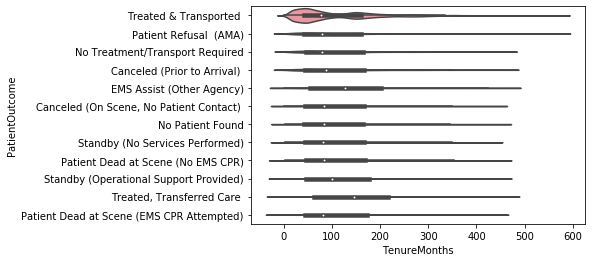

In [311]:
sns.violinplot("TenureMonths","PatientOutcome",
               data=df_patientsGood, 
               scale='count',
              order=OutcomeOrder);

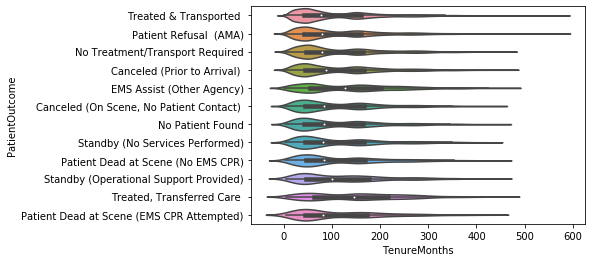

In [312]:
sns.violinplot("TenureMonths","PatientOutcome",
               data=df_patientsGood, 
               scale='area',
              order=OutcomeOrder);

Now lets bin by years.  Here we simply divid the TenureMonths by 12 and drop the remainder.

In [313]:
df_patientsGood.loc[:,"TenureYears"]=np.floor(df_patientsGood["TenureMonths"]/12)

C:\Users\Michael\Anaconda3_7\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Michael\Anaconda3_7\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [314]:
df_patientsGood.shape

(542685, 23)

In [315]:
df_patientsGood.head()

,Unnamed: 0,PatientId,FRDPersonnelID,Shift,UnitId,FireStation,Battalion,PatientOutcome,PatientGender,DispatchTime,...,TenureMonths,ShiftCode,Shift_A,Shift_B,Shift_C,UnitIdCode,PatientOutcomeCode,PatientGenderCode,ProviderGenderCode,TenureYears
0,0,479838,6ED7C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M404,4,401,Standby (No Services Performed),NaN,2018-01-01 00:29:02,...,244,1,1,0,0,1,1,0,1,20.0
1,1,479838,F39A55F0-C619-E511-80CA-001DD8B71D38,A - Shift,M404,4,401,Standby (No Services Performed),NaN,2018-01-01 00:29:02,...,130,1,1,0,0,1,1,0,1,10.0
2,2,479838,D6D3C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M404,4,401,Standby (No Services Performed),NaN,2018-01-01 00:29:02,...,112,1,1,0,0,1,1,0,1,9.0
3,3,479839,71D4C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M401,1,402,No Treatment/Transport Required,NaN,2018-01-01 00:40:54,...,74,1,1,0,0,2,2,0,1,6.0
4,4,479839,F9D4C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M401,1,402,No Treatment/Transport Required,NaN,2018-01-01 00:40:54,...,70,1,1,0,0,2,2,0,1,5.0


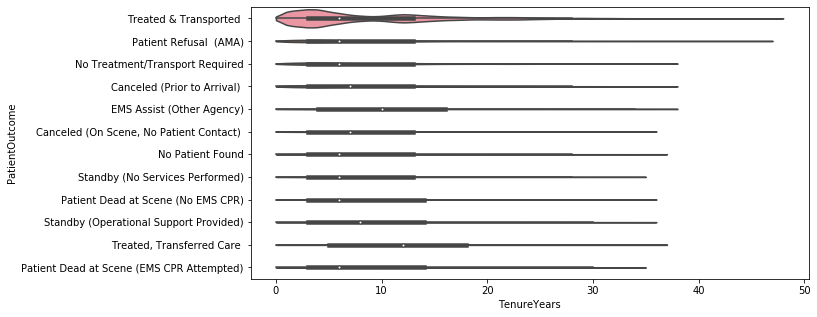

In [316]:
plt.figure(figsize=(10,5))
sns.violinplot("TenureYears","PatientOutcome",
               data=df_patientsGood, 
               scale='count',
              order=OutcomeOrder, cut=0);

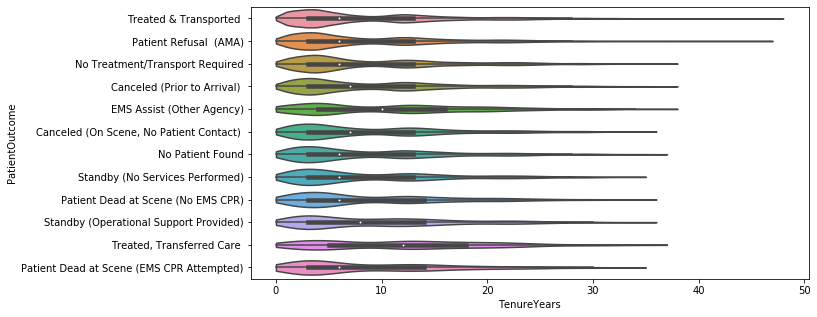

In [317]:
plt.figure(figsize=(10,5))
sns.violinplot("TenureYears","PatientOutcome",
               data=df_patientsGood,
               scale='area',
               inner='box',
              order=OutcomeOrder, cut=0);

### Now lets look at binning tenure by the decade

In [318]:
df_patientsGood.loc[:,"TenureDecade"]=np.floor(df_patientsGood["TenureMonths"]/120)

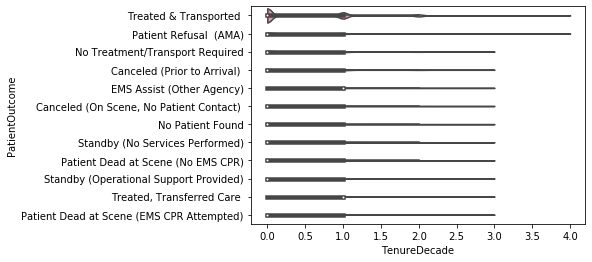

In [319]:
sns.violinplot("TenureDecade","PatientOutcome",
               data=df_patientsGood, 
               scale='count',
              order=OutcomeOrder,
              cut=0);

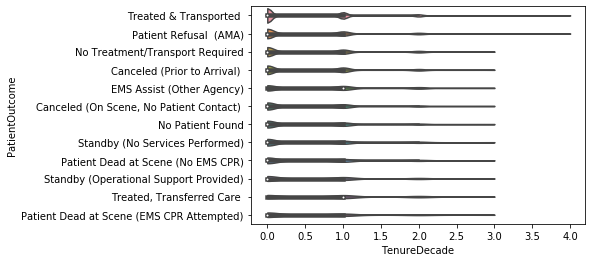

In [320]:
sns.violinplot("TenureDecade","PatientOutcome",
               data=df_patientsGood, 
               scale='area',
              order=OutcomeOrder,
              cut=0);

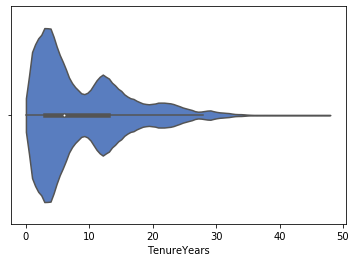

In [321]:
sns.violinplot(x="TenureYears",
               hue='FRDPersonnelGender',
               data=df_patientsGood,
               split=True,
               palette="muted",
               scale='count', cut=0);

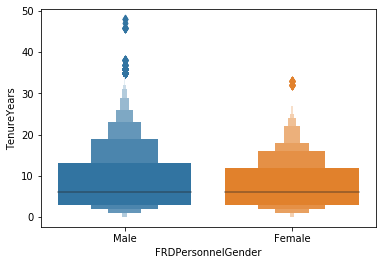

In [322]:
sns.boxenplot(data=df_patientsGood,
            y="TenureYears",
            x="FRDPersonnelGender")

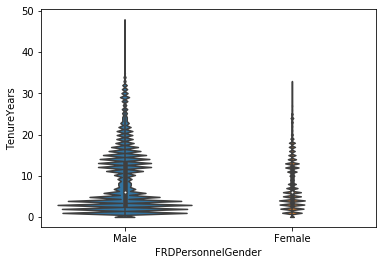

In [323]:
sns.violinplot(data=df_patientsGood,
            y="TenureYears",
            x="FRDPersonnelGender",
              scale="count", bw=.02, cut=0)

### Exploring an alternative definition for tenure (number of calls instead of time in department)

In [324]:
df_patientsGood.reset_index(inplace=True)
df_patientsGood.columns

Index(['index', 'Unnamed: 0', 'PatientId', 'FRDPersonnelID', 'Shift', 'UnitId',
       'FireStation', 'Battalion', 'PatientOutcome', 'PatientGender',
       'DispatchTime', 'FRDPersonnelGender', 'FRDPersonnelStartDate',
       'CrewMemberRoles', 'TenureMonths', 'ShiftCode', 'Shift_A', 'Shift_B',
       'Shift_C', 'UnitIdCode', 'PatientOutcomeCode', 'PatientGenderCode',
       'ProviderGenderCode', 'TenureYears', 'TenureDecade'],
      dtype='object')

In [327]:
#Remove unwanted columns to make dataset easier to work with

df_cum=df_patientsGood.drop(columns=['Unnamed: 0','Shift', 'ShiftCode', 'Shift_A', 'Shift_B', 'Shift_C',
       'PatientOutcomeCode', 'PatientGenderCode', 'PatientGender', 'UnitIdCode',
       'ProviderGenderCode']).copy()

df_cum.head()

,index,PatientId,FRDPersonnelID,UnitId,FireStation,Battalion,PatientOutcome,DispatchTime,FRDPersonnelGender,FRDPersonnelStartDate,CrewMemberRoles,TenureMonths,TenureYears,TenureDecade
0,0,479838,6ED7C99E-9E01-E211-B5F5-78E7D18CFD3C,M404,4,401,Standby (No Services Performed),2018-01-01 00:29:02,Male,1997-08-18,"Primary Patient Caregiver-At Scene,Primary Pat...",244,20.0,2.0
1,1,479838,F39A55F0-C619-E511-80CA-001DD8B71D38,M404,4,401,Standby (No Services Performed),2018-01-01 00:29:02,Male,2007-02-19,"Driver-Transport,Other Patient Caregiver-At Scene",130,10.0,1.0
2,2,479838,D6D3C99E-9E01-E211-B5F5-78E7D18CFD3C,M404,4,401,Standby (No Services Performed),2018-01-01 00:29:02,Male,2008-08-18,"Intern/Student,Other Patient Caregiver-At Scen...",112,9.0,0.0
3,3,479839,71D4C99E-9E01-E211-B5F5-78E7D18CFD3C,M401,1,402,No Treatment/Transport Required,2018-01-01 00:40:54,Male,2011-10-24,"Primary Patient Caregiver-At Scene,Primary Pat...",74,6.0,0.0
4,4,479839,F9D4C99E-9E01-E211-B5F5-78E7D18CFD3C,M401,1,402,No Treatment/Transport Required,2018-01-01 00:40:54,Male,2012-02-27,"Driver-Response,Driver-Transport",70,5.0,0.0


### This batch of code will create a "Cumulative Calls" column that captures the total number of calls a provider has been on including the current call

In [328]:
df_cum['CallCount']=1
df_cum=df_cum.sort_values("DispatchTime")
#df_gb=df_cum.groupby(by=["FRDPersonnelID","PatientId"]).count().groupby(level=0)
df_gb=df_cum.groupby(by=["FRDPersonnelID","DispatchTime"]).count().groupby(level=0)
#df_gb.apply(print)
cumsums=df_gb['CallCount'].cumsum()
#df_cum.set_index(["FRDPersonnelID","PatientId"],inplace=True)
df_cum.set_index(["FRDPersonnelID","DispatchTime"],inplace=True)
df_cum['CumulativeCalls'] = cumsums
df_cum.reset_index(inplace=True)
df_cum.head()

,FRDPersonnelID,DispatchTime,index,PatientId,UnitId,FireStation,Battalion,PatientOutcome,FRDPersonnelGender,FRDPersonnelStartDate,CrewMemberRoles,TenureMonths,TenureYears,TenureDecade,CallCount,CumulativeCalls
0,58D5C99E-9E01-E211-B5F5-78E7D18CFD3C,2018-01-01 00:04:06,7,479853,M435,35,407,Treated & Transported,Male,2004-07-12,"Primary Patient Caregiver-At Scene,Primary Pat...",161,13.0,1.0,1,1
1,E3355223-4A4C-45E7-B0FF-3CB9161A3546,2018-01-01 00:04:06,8,479853,M435,35,407,Treated & Transported,Male,2016-02-08,"Driver-Response,Driver-Transport",22,1.0,0.0,1,1
2,EFD3C99E-9E01-E211-B5F5-78E7D18CFD3C,2018-01-01 00:20:49,5,479851,M419,19,406,Patient Refusal (AMA),Male,2006-10-02,"Driver-Response,Driver-Transport",135,11.0,1.0,1,1
3,87FF4CAE-C419-E511-80CA-001DD8B71D38,2018-01-01 00:20:49,6,479851,M419,19,406,Patient Refusal (AMA),Male,2015-01-12,"Primary Patient Caregiver-At Scene,Primary Pat...",35,2.0,0.0,1,1
4,6ED7C99E-9E01-E211-B5F5-78E7D18CFD3C,2018-01-01 00:29:02,0,479838,M404,4,401,Standby (No Services Performed),Male,1997-08-18,"Primary Patient Caregiver-At Scene,Primary Pat...",244,20.0,2.0,1,1


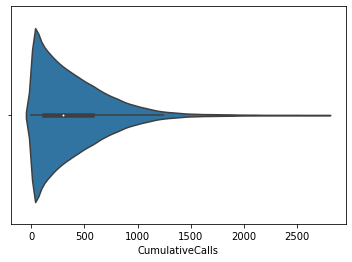

In [329]:
sns.violinplot(data=df_cum, x="CumulativeCalls")

Text(0.5, 1.0, 'Tenure distribution')

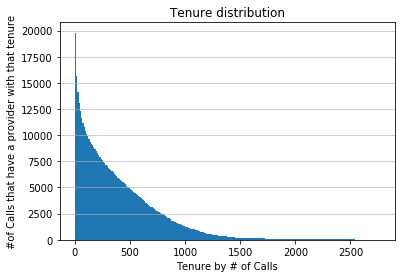

In [330]:
n, bins, patches = plt.hist(x=df_cum['CumulativeCalls'],bins='auto',)
plt.grid(axis='y', alpha=.75)
plt.xlabel('Tenure by # of Calls')
plt.ylabel('#of Calls that have a provider with that tenure')
plt.title('Tenure distribution')

Text(0.5, 1.0, 'Tenure distribution')

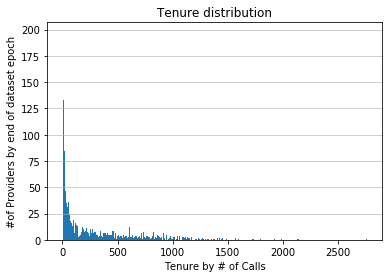

In [331]:
n, bins, patches = plt.hist(x=df_cum["FRDPersonnelID"].value_counts(),bins=500)
plt.grid(axis='y', alpha=.75)
plt.xlabel('Tenure by # of Calls')
plt.ylabel('#of Providers by end of dataset epoch')
plt.title('Tenure distribution')

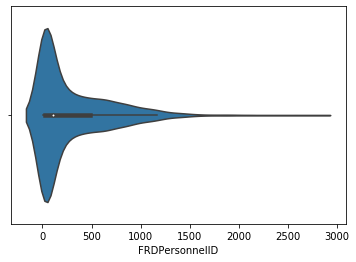

In [332]:
sns.violinplot(x=df_cum["FRDPersonnelID"].value_counts())

In [333]:
df_one=df_cum[df_cum["FRDPersonnelID"]=='DA8ED993-E0AB-4521-8FF6-54B423A95B2B']
df_one.shape

(2763, 16)

In [334]:
df_one.tail()

,FRDPersonnelID,DispatchTime,index,PatientId,UnitId,FireStation,Battalion,PatientOutcome,FRDPersonnelGender,FRDPersonnelStartDate,CrewMemberRoles,TenureMonths,TenureYears,TenureDecade,CallCount,CumulativeCalls
542101,DA8ED993-E0AB-4521-8FF6-54B423A95B2B,2021-02-02 11:34:12,541688,1464135,M408B,8,404,Treated & Transported,Male,2017-04-17,"Primary Patient Caregiver-At Scene,Primary Pat...",45,3.0,0.0,1,2759
542137,DA8ED993-E0AB-4521-8FF6-54B423A95B2B,2021-02-02 12:35:29,541720,1464203,M408B,8,404,Treated & Transported,Male,2017-04-17,"Primary Patient Caregiver-At Scene,Primary Pat...",45,3.0,0.0,1,2760
542199,DA8ED993-E0AB-4521-8FF6-54B423A95B2B,2021-02-02 14:36:11,541793,1464288,M408B,8,404,Treated & Transported,Male,2017-04-17,"Primary Patient Caregiver-At Scene,Primary Pat...",45,3.0,0.0,1,2761
542290,DA8ED993-E0AB-4521-8FF6-54B423A95B2B,2021-02-02 17:51:43,541860,1464437,M408B,8,404,Treated & Transported,Male,2017-04-17,"Primary Patient Caregiver-At Scene,Primary Pat...",45,3.0,0.0,1,2762
542361,DA8ED993-E0AB-4521-8FF6-54B423A95B2B,2021-02-02 20:38:21,541966,1464560,M408B,8,404,Treated & Transported,Male,2017-04-17,"Primary Patient Caregiver-At Scene,Primary Pat...",45,3.0,0.0,1,2763


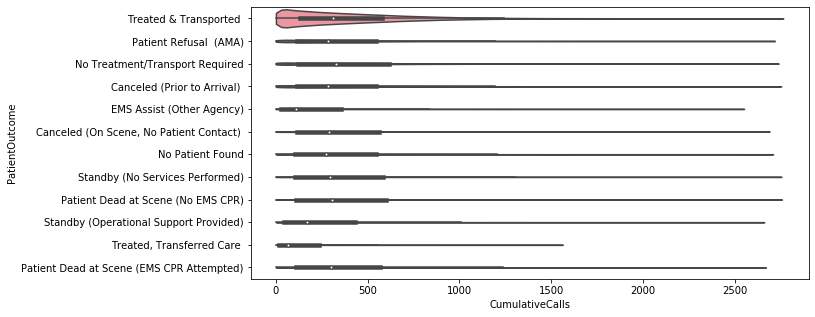

In [335]:
plt.figure(figsize=(10,5))
sns.violinplot("CumulativeCalls","PatientOutcome",
               data=df_cum, 
               scale='count',
              order=OutcomeOrder,
              cut=0);

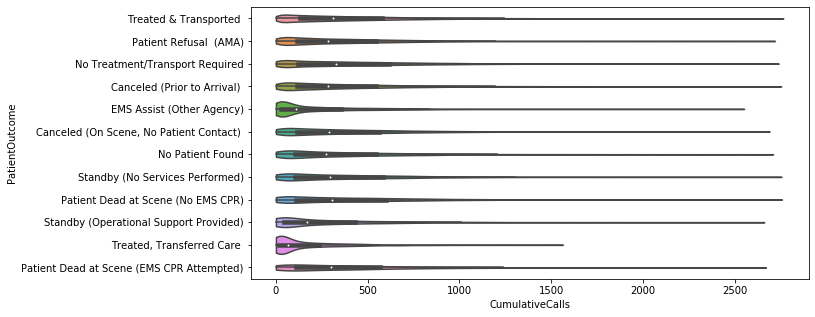

In [336]:
plt.figure(figsize=(10,5))
sns.violinplot("CumulativeCalls","PatientOutcome",
               data=df_cum, 
               scale='area',
              order=OutcomeOrder,
              cut=0);

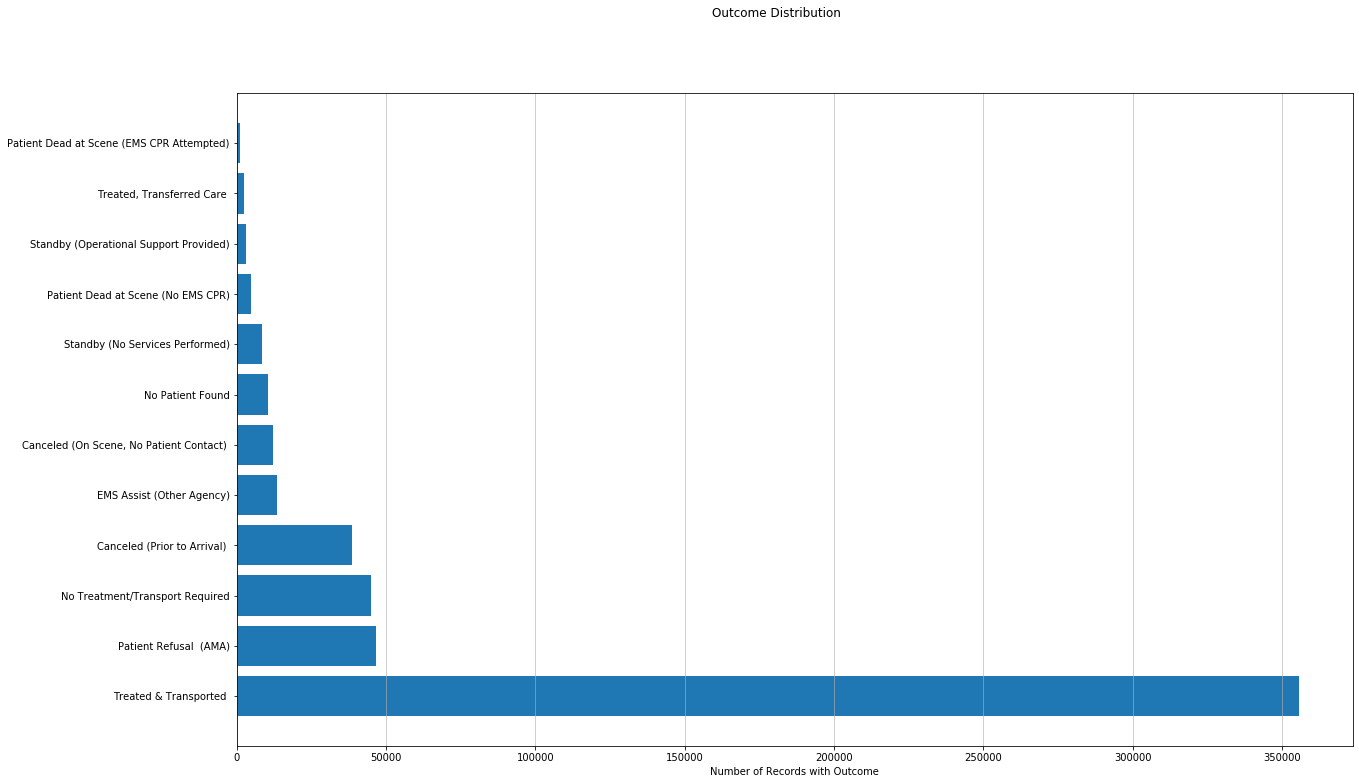

In [337]:
fig=plt.figure(figsize=(20,12))
value_counts=df_cum['PatientOutcome'].value_counts()
df_Outcomes=pd.DataFrame(value_counts)
df_Outcomes.reset_index(inplace=True)
df_Outcomes.columns=["Outcome","Count"]
df_Outcomes.set_index(keys=["Outcome"])
Outcomes_cat=pd.Categorical(OutcomeOrder,ordered=True)
df_Outcomes.sort_index(level=Outcomes_cat)

#Bar chart
ax1=plt.subplot()
ax1.barh(df_Outcomes['Outcome'],width=df_Outcomes['Count'])
ax1.set_xlabel('Number of Records with Outcome')
ax1.grid(axis='x', alpha=.75)

#Draw vertical line on boxplot indicating the percentage of male patients vs female patients
#patientCount=dfReduced[['PatientId','PatientGender']].drop_duplicates()['PatientGender'].value_counts()
#ax1.axvline(x=(patientCount['Male']/(patientCount.sum())*100),color='black')

fig.suptitle('Outcome Distribution')
plt.show()

In [338]:
#Drop the Treated & Transported records to bring out the detail
df_Outcomes2=df_Outcomes.iloc[1:]
df_Outcomes2.shape

(11, 2)

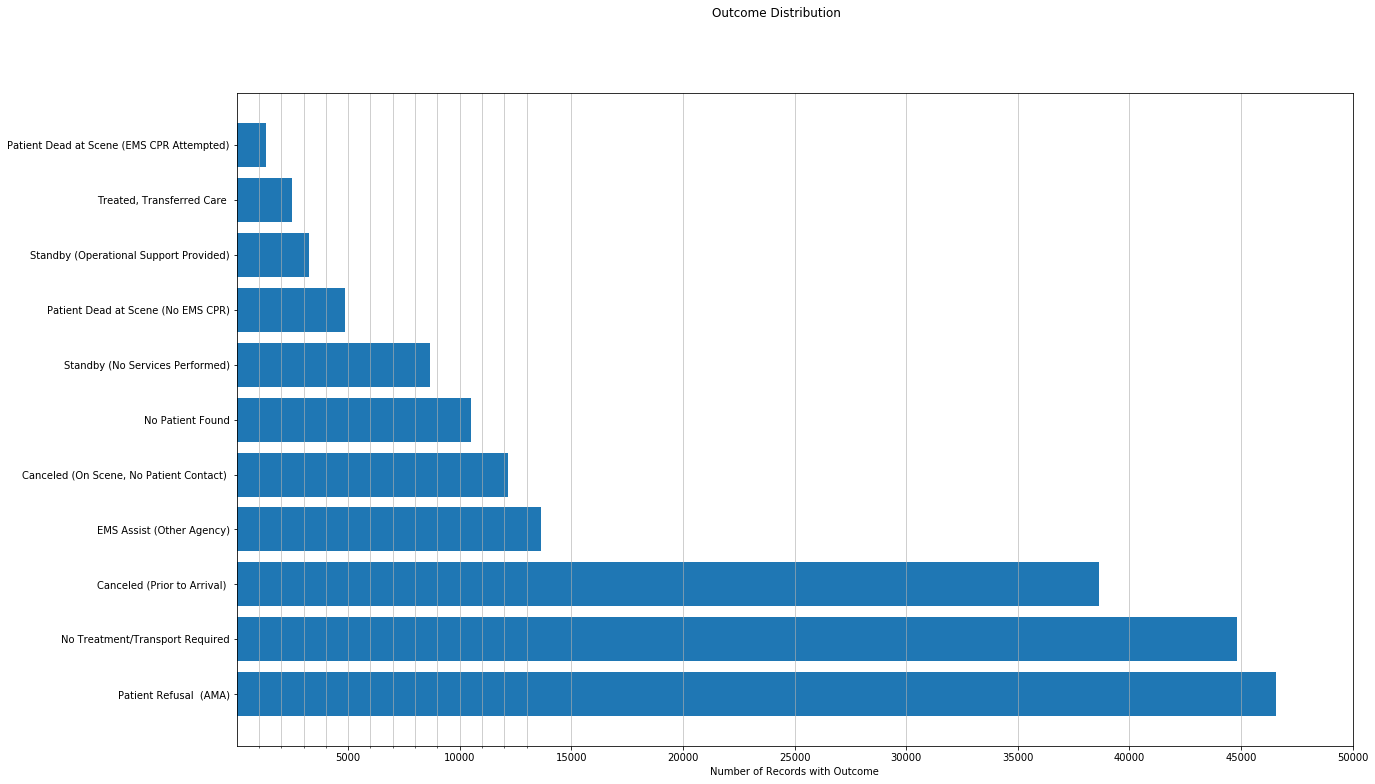

In [339]:
fig=plt.figure(figsize=(20,12))

#Bar chart
ax1=plt.subplot()
ax1.barh(df_Outcomes2['Outcome'],width=df_Outcomes2['Count'])
ax1.set_xlabel('Number of Records with Outcome')
ax1.grid(axis='x', alpha=.75, which='both')
ax1.set_xticks(minor=True, ticks=[1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000])
ax1.set_xticks(minor=False, ticks=[5000,10000,15000,20000,25000,30000,35000,40000,45000,50000])

#Draw vertical line on boxplot indicating the percentage of male patients vs female patients
#patientCount=dfReduced[['PatientId','PatientGender']].drop_duplicates()['PatientGender'].value_counts()
#ax1.axvline(x=(patientCount['Male']/(patientCount.sum())*100),color='black')

fig.suptitle('Outcome Distribution')
plt.show()